## P2

In [1]:
import warnings
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
DATA_PATH="../../data/pml/"

# Load Data

In [3]:
X, y = shuffle(np.load(DATA_PATH+'x_train.npy'), np.load(DATA_PATH+'y_train.npy'))
data_test = np.load(DATA_PATH+'x_test.npy')

In [4]:
columns=X.dtype.names

In [5]:
df_train=pd.DataFrame(X, columns=columns)
df_test=pd.DataFrame(data_test, columns=columns)

In [6]:
df_train.sample(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
12608,2014-07-09,3.0,2.00,2783,11177,2.0,False,3,8,2783,0,1910,1999,98126,47.537998,-122.379997
7632,2014-10-10,3.0,2.75,2480,3240,1.5,False,3,9,1890,590,1929,0,98112,47.639900,-122.310997
1345,2014-09-19,4.0,1.50,1890,6052,1.0,False,4,7,1890,0,1955,0,98125,47.705502,-122.300003
7434,2014-06-25,3.0,1.50,1250,7700,1.0,False,5,7,1250,0,1968,0,98056,47.538300,-122.178001
11442,2014-07-09,3.0,1.00,1200,7800,1.0,False,4,7,1200,0,1954,0,98126,47.519600,-122.371002


In [7]:
df_test.sample(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
4903,2014-12-11,3.0,1.50,1840,10125,1.0,False,4,8,1220,620,1959,0,98040,47.560699,-122.217003
5896,2014-10-31,4.0,3.25,2885,33671,2.0,False,4,8,2885,0,1984,0,98027,47.517399,-122.045998
2214,2014-06-09,3.0,1.75,2050,3520,1.0,False,4,7,1070,980,1977,0,98136,47.553600,-122.399002
4454,2014-07-24,3.0,3.00,3730,35900,1.0,False,3,9,2960,770,1979,0,98008,47.581402,-122.122002
2860,2014-08-26,3.0,2.00,1820,17600,1.0,False,5,7,1820,0,1972,0,98059,47.470299,-122.112000


## Decrease skewness of Price

In [8]:
df_train['Price']=y

In [9]:
df_train.Price.describe()

count    1.500000e+04
mean     5.405347e+05
std      3.670720e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

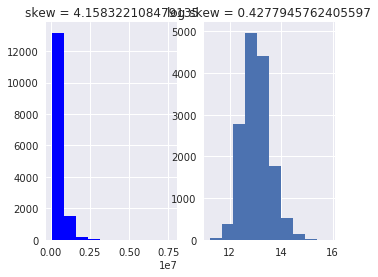

In [10]:
width, height = 3, 1
plt.figure(figsize=(8, 4))

plt.subplot(height, width, 1)
plt.hist(y, color='blue')
name='skew = %s'%df_train.Price.skew()
plt.title(name)

target = np.log(df_train.Price)
plt.subplot(height, width, 2)
name='log skew = %s'%target.skew()
plt.hist(target)
plt.title(name)

plt.show()
# A value closer to 0 means that we have improved the skewness of the data.

In [11]:
df_train.Price=target

# Analysis of Features

## Feature analysis (skipped)

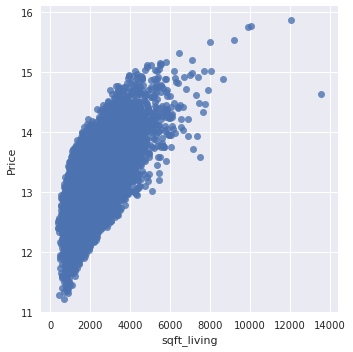

In [12]:
plt.figure()
otl = sns.lmplot('sqft_living', 'Price',data=df_train, fit_reg=False);

In [13]:
df_train[(df_train['Price'] < 3000000) & (df_train['sqft_living'] > 10000)][['sqft_living','Price']]

,sqft_living,Price
6755,13540,14.639686
7818,10040,15.770310
9269,12050,15.856731


(0, 6000000)

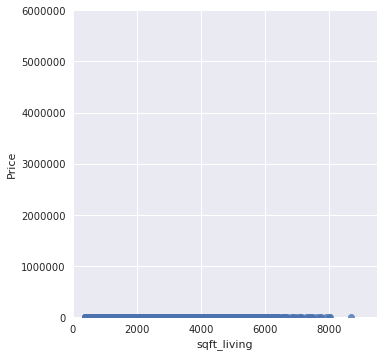

In [14]:
df_train.drop(df_train[(df_train['sqft_living'] > 9000)].index,inplace=True)
plt.figure()
otl = sns.lmplot('sqft_living', 'Price',data=df_train, fit_reg=False)
plt.xlim(0,9500)
plt.ylim(0,6000000)

In [15]:
y_df=df_train.Price
print(df_train.shape)

(14995, 17)


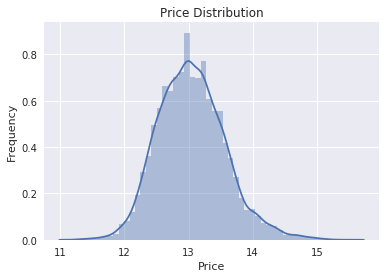

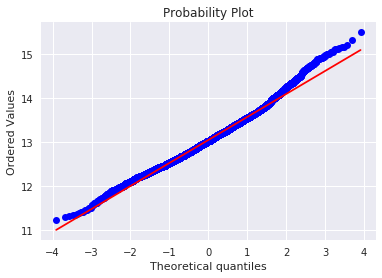

In [16]:
sns.distplot(df_train['Price'])
plt.title('Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(df_train['Price'], plot=plt)
plt.show()

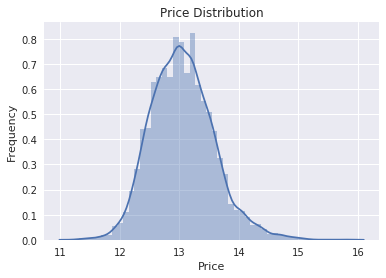

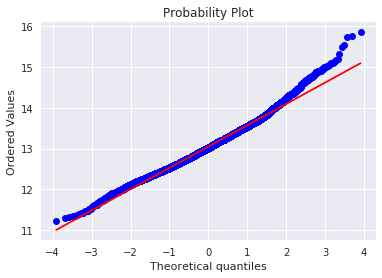

In [17]:
sns.distplot(target)
plt.title('Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(target, plot=plt)
plt.show()

df_train=df_train.drop(['date','waterfront'],axis=1)

plt.figure(figsize=(15,5))

# correlation table
corr_train = df_train.corr()

# select top 10 highly correlated variables with SalePrice
num = 10
col = corr_train.nlargest(num, 'Price')['Price'].index
coeff = np.corrcoef(df_train[col].values.T)

# heatmap
heatmp = sns.heatmap(coeff, annot = True, xticklabels = col.values, yticklabels = col.values, linewidth=2,cmap='PiYG', linecolor='blue')

In [18]:
# In order to avoid repeating unnecessary codes, for our convenience, let's combine the train and test set.
df = pd.concat([df_train.drop('Price',axis=1), df_test]).reset_index()

df.drop(['index'],axis=1,inplace=True)

In [19]:
df['R']=np.sqrt(np.power(df.long,2)+np.power(df.lat,2))
df.drop(['long','lat'],axis=1,inplace=True)

In [20]:
df.sample(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,R
13740,2014-09-05,4.0,2.50,3420,183387,2.0,False,3,10,3420,0,2000,0,98053,130.943008
9816,2015-04-29,5.0,3.00,2480,7200,1.0,False,3,7,1560,920,1999,0,98188,131.169556
2586,2014-08-21,3.0,1.75,1470,27000,1.0,False,3,7,1470,0,1958,0,98198,131.172409
9512,2015-05-09,4.0,2.00,2380,6122,1.0,False,4,8,1310,1070,1949,0,98199,131.352814
12867,2014-10-13,4.0,2.25,2480,6000,2.0,False,3,10,2380,100,1929,0,98199,131.349625


In [21]:
from sklearn.preprocessing import LabelEncoder

ordinals = ['condition','grade','waterfront']

for ordinal in ordinals:
    le = LabelEncoder()
    le.fit(df[ordinal])
    df[ordinal] = le.transform(df[ordinal])

In [22]:
# Assign numeric features by excluding non numeric features
numeric = df.dtypes[df.dtypes != 'object'].index

# Display the skewness of each column and sort the values in descending order 
skewness = df[numeric].apply(lambda x: x.skew()).sort_values(ascending=False)

# Create a dataframe and show 5 most skewed features 
sk_df = pd.DataFrame(skewness,columns=['skewness'])
sk_df['skw'] = abs(sk_df)
sk_df.sort_values('skw',ascending=False).drop('skw',axis=1).head()

,skewness
sqft_lot,13.089410
waterfront,11.419649
yr_renovated,4.554580
bedrooms,1.975664
sqft_basement,1.538818


In [23]:
skw_feature = skewness[abs(skewness) > 0.5].index

# Transform skewed features to normal distribution by taking log(1 + input)
df[skw_feature] = np.log1p(df[skw_feature])

In [24]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,R
0,2014-09-15,1.386294,2.50,7.433075,9.763306,1.098612,0.0,1.098612,1.791759,7.433075,0.000000,2003,0.0,98038,4.882061
1,2014-05-12,1.791759,3.00,8.418698,12.463606,0.916291,0.0,1.386294,2.079442,8.071219,7.193686,2003,0.0,98077,4.883412
2,2014-10-06,1.386294,2.00,7.252054,8.517393,0.693147,0.0,1.609438,1.791759,6.608001,6.508769,1908,0.0,98107,4.885229
3,2014-07-21,1.386294,1.50,7.320527,12.748760,0.693147,0.0,1.386294,1.791759,7.320527,0.000000,1964,0.0,98022,4.881626
4,2015-03-30,1.609438,2.75,7.705713,8.577535,0.693147,0.0,1.609438,1.791759,7.065613,6.957497,1951,0.0,98144,4.884496


In [25]:
df = pd.get_dummies(df)
print(df.shape)

(21608, 386)


In [26]:
X_train = df[:df_train.shape[0]]
X_test = df[df_train.shape[0]:]
print("training shape:{}, test shape:{}".format(X_train.shape,X_test.shape))


training shape:(14995, 386), test shape:(6613, 386)


# Preprocessing

In [37]:
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV,learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LassoCV,ElasticNetCV,Lasso,ElasticNet

from xgboost import XGBRegressor

In [28]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
#X_train = RobustScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.columns )

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.columns)
#X_test = RobustScaler().fit_transform(X_test)

In [29]:
kfold = KFold(n_splits=20, random_state= 0, shuffle = True)

In [30]:
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_df, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

In [31]:
KR = KernelRidge()

KR_param_grid = {
    'alpha' : [0.93],
    'kernel' : ['polynomial'],
    'gamma':[0.001],
    'degree': [3],
    'coef0': [1.5]
}

KR_CV = GridSearchCV(KR, param_grid = KR_param_grid, cv = kfold, scoring = "neg_mean_squared_error",n_jobs = -1, verbose = 1)
KR_CV.fit(X_train, y_df)
KR_best = KR_CV.best_estimator_
print(KR_best)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  2.2min remaining:   43.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


KernelRidge(alpha=0.93, coef0=1.5, degree=3, gamma=0.001, kernel='polynomial',
      kernel_params=None)


In [32]:
y_submission_1 = np.expm1(KR_best.predict(X_test))

In [34]:
import datetime
with open(f'prediction{datetime.datetime.now()}.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_submission_1, 1):
        print('%i,%d' % pair, file=out)

In [38]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2], random_state = 1, n_jobs = -1, verbose = 1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Optimized Alpha:", alpha)

lasso = LassoCV(alphas = alpha * np.linspace(0.5,1.5,20), cv = kfold, random_state = 1, n_jobs = -1)
lasso.fit(X_train, y_df)
alpha = lasso.alpha_
print("Final Alpha:", alpha)

.........................................................[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Optimized Alpha: 0.003
Final Alpha: 0.0024473684210526317


In [39]:
y_submission_2 = np.expm1(lasso.predict(X_test))
with open(f'prediction{datetime.datetime.now()}.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_submission_2, 1):
        print('%i,%d' % pair, file=out)

In [40]:
elnet = ElasticNetCV(alphas = [0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.003, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.2, 0.4, 0.6, 0.8, 1, 1.2] 
                ,l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
                ,cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_df)
alpha = elnet.alpha_
ratio = elnet.l1_ratio_
print("Optimized Alpha:", alpha)
print("Optimized l1_ratio:", ratio)

elnet = ElasticNetCV(alphas = alpha * np.linspace(0.5,1.5,20), l1_ratio = ratio * np.linspace(0.9,1.3,6), 
                     cv = kfold, random_state = 1, n_jobs = -1)
elnet.fit(X_train, y_df)

alpha = elnet.alpha_
ratio = elnet.l1_ratio_

print("Final Alpha:", alpha)
print("Final l1_ratio:", ratio)

Optimized Alpha: 0.003
Optimized l1_ratio: 0.9
Final Alpha: 0.002763157894736842
Final l1_ratio: 0.882


In [41]:
y_submission_3 = np.expm1(elnet.predict(X_test))
with open(f'prediction{datetime.datetime.now()}.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_submission_3, 1):
        print('%i,%d' % pair, file=out)

In [42]:
XGB = XGBRegressor()

xg_param_grid = {
              'n_estimators' :[870],
              'learning_rate': [0.04],
              
              'max_depth': [3],
              'min_child_weight':[0.2],
              
              'gamma': [0],
                
              'subsample':[0.8],
              'colsample_bytree':[0.7]
    
              #'reg_alpha':[0.08,0.09,0.095,0.1,0.15,0.2],
              #'reg_lambda':[0,0.001,0.002]
              }
                
gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y_df)
XGB_best = gsXGB.best_estimator_
print(gsXGB.best_params_)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  1.1min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


{'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 0.2, 'n_estimators': 870, 'subsample': 0.8}


In [44]:
y_submission_6 = np.exp(gsXGB.predict(X_test))
with open(f'prediction{datetime.datetime.now()}.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(y_submission_6, 1):
        print('%i,%d' % pair, file=out)

## categorical data

In [ ]:
df_train.waterfront = df_train.waterfront.astype('category')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['Price'], value_vars=['waterfront'])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Price")

In [ ]:
categorical_features = [a for a in quantitative[:-1] + df_train.columns.tolist() if (a not in quantitative[:-1]) or (a not in df_train.columns.tolist())]
df_categ = df_train[categorical_features]
df_categ.head()

In [ ]:
corr = df_train.corr()
corr.describe()

We also checked the cross-correlations among all the numerical variables. The high correlation coefficients (either ≥ 0.5 or ≤ -0.4) are marked out as follows. This gives us some useful insight to apply PCA (principal component analysis) on those highly correlated pairs/groups of numeric variables, to eliminate multi-colinearity among them, and hopefully may lead to better model prediction performance in the end. This would be one of promising future directions to work on.

In [ ]:
corr = quantitative2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
quantitative2['SalePrice']=y
corrmat = quantitative2.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
fig = plt.figure(figsize=(10,10))
g = sns.heatmap(quantitative2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

We can do that using the following transformations:

$x_{sin} = \sin(\frac{2 * \pi * x}{\max(x)})$

$x_{cos} = \cos(\frac{2 * \pi * x}{\max(x)})$

Let's do this for our hourly data:

In [ ]:
def simplify_date(df):
    df['year_date'] = pd.DatetimeIndex(df['date']).year
    df['month_date'] = pd.DatetimeIndex(df['date']).month
    df['day_date']= pd.DatetimeIndex(df['date']).day
    return df.drop("date",axis=1)

def simplify_month_day(df):
    df['mnth_sin'] = np.sin((df.month_date-1)*(2.*np.pi/12))
    df['mnth_cos'] = np.cos((df.month_date-1)*(2.*np.pi/12))
    return df

def simplify_waterfront(df):
    df['waterfront'] = df['waterfront'].map({False: 0, True: 1})
    df.waterfront=df.waterfront.astype('category')
    return df

def simplify_yr_renovated(df):
    df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['year_date'], df['yr_renovated'])
    return df

def simplify_xy(df):
    df['R']=np.sqrt(np.power(df.long,2)+np.power(df.lat,2))
    return df.drop(['long','lat'],axis=1)

def calculate_age(df):
    df['age'] = df.year_date - df.yr_built
    df['asnew'] = df.year_date - df.yr_renovated
    return df.drop(['yr_built','year_date','yr_renovated'],axis=1)

def transform_zip(df):
    df['zip']=df.zipcode.astype('category')
    return df.drop('zipcode',axis=1)

def transform(df):
    df=simplify_date(df)
    df=simplify_month_day(df)
    df=df.drop(["month_date","day_date"],axis=1)
    df=simplify_waterfront(df)
    df=simplify_yr_renovated(df)
    df=simplify_xy(df)
    df=calculate_age(df)
    df=transform_zip(df)
    return df

def scale_features(df_train, df_test):
    quantitative1 = df_train.select_dtypes(include = ['float32', 'int32'])
    quantitative2 = df_test.select_dtypes(include = ['float32', 'int32'])
    df_combined = pd.concat([quantitative1, quantitative2])
    for feature in df_combined.columns:
        scaler = preprocessing.StandardScaler()
        scaler.fit(np.array(df_combined[feature]).reshape(-1, 1))
        # Drop column B as it is now encoded
        df_train[feature] = scaler.transform(np.array(df_train[feature].reshape(-1, 1)))
        df_test[feature] = scaler.transform(np.array(df_test[feature].reshape(-1, 1)))
    return df_train, df_test  

In [ ]:
df_train=transform(df_train)
df_test=transform(df_test)

df_train, df_test=scale_features(df_train, df_test)

df_train, df_test = pd.get_dummies(df_train),pd.get_dummies(df_test)

In [ ]:
df_train.sample(10)

## Encode zipcode

In [ ]:
len(np.unique(df_train.zipcode)),len(np.unique(df_test.zipcode))

In [ ]:
df_train['Price']=y

In [ ]:
def calculate_zip_plot(df):
    y_plot=df.groupby('zipcode')['Price'].mean()
    y_plot=y_plot.sort_values()
    zip_labels=y_plot.index.astype('str')
    y_pos=np.arange(len(zip_labels))
    x=y_plot.values
    plt.figure(figsize=(15,10))

    plt.barh(y_pos, x, color='green')
    plt.yticks(y_pos,zip_labels)
    
    y_plot=y_plot.reset_index()
    
    plt.show()
    
    return y_plot
y_plot=calculate_zip_plot(df_train)

Divide into 3 categories

In [ ]:
def get_zipcodes(y_plot):
    n=len(y_plot.index)
    y_pos=y_plot.zipcode
    d1=n//3
    
    dic={}
    for ix in range(d1):
        r=y_pos[ix]
        dic[r]=3
    for ix in range(d1,2*d1):
        r=y_pos[ix]
        dic[r]=2
    for ix in range(2*d1,n):
        r=y_pos[ix]        
        dic[r]=1
    return dic

In [ ]:
dic=get_zipcodes(y_plot)
# dic

In [ ]:
def transform_zipcode(df,dic):
    for ix,r in df.iterrows():
        df['zip']=df.zipcode.apply(lambda x: dic[x])
    return df.drop('zipcode',axis=1)

In [ ]:
df_train=transform_zipcode(df_train,dic)
df_train.sample(10)

In [ ]:
df_test=transform_zipcode(df_test,dic)
df_test.sample(10)

def grade_plot(df):
    y_plot=df.groupby('condition')['Price'].mean()
    y_plot=y_plot.sort_values()
    zip_labels=y_plot.index.astype('str')
    y_pos=np.arange(len(zip_labels))
    x=y_plot.values
    plt.figure(figsize=(15,10))

    plt.barh(y_pos, x, color='green')
    plt.yticks(y_pos,zip_labels)
    
    plt.show()
grade_plot(df_train)

In [ ]:
df_train=df_train.drop('Price',axis=1)

## Min-max scaling

In [ ]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
len(df_train.columns)

In [ ]:
pca_range=range(1,len(df_train.columns))
scores =[]
for i in pca_range:
    clf=RandomForestRegressor()
    pca_hp = PCA(i)
    x_fit = pca_hp.fit_transform(df_train)
    scores.append(cross_val_score(clf, x_fit, target, cv=5, scoring=mape_scorer).mean())

In [ ]:
plt.barh(pca_range,scores)
plt.yticks(pca_range,pca_range)

# Declare Loss MAPE function

In [ ]:
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.model_selection import cross_val_score

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_scorer=make_scorer(mean_absolute_percentage_error)

# Find best model

In [ ]:
best_model=None
best_loss=2.0

In [ ]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor # do not use

models=[
#     RandomForestRegressor(),
        HuberRegressor(),
        ElasticNet(),
        LinearRegression(),
        Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        Lasso(),
        SGDRegressor(),
        Ridge(alpha=1.0),
       ]

In [ ]:
def cv_score(model,x_train,y_train):
    global best_model,best_loss
    clf =model
    score=cross_val_score(clf, x_train, y_train, cv=5, scoring=mape_scorer).mean()
    if score < best_loss:
        best_model = clf
        best_loss = score
    return score

In [ ]:
for model in models:
    cv_score(model)
print(f'best: {best_loss}\t{best_model}\n')

# Predict & Submit

In [ ]:
df_train,df_test=df_train.drop('date',axis=1),df_test.drop('date',axis=1)

In [ ]:
len(df_train.columns)==len(df_test.columns)

In [ ]:
clf=Ridge()
pca_hp = PCA(50)
pca_hp.fit(np.concatenate((df_train,df_test)))
x_train = pca_hp.transform(df_train)
x_test = pca_hp.transform(df_test)
cross_val_score(clf, x_fit, target, cv=5, scoring=mape_scorer).mean()

In [ ]:
clf.fit(df_train,target)
preds=clf.predict(df_test)

In [ ]:
sum(n < 0 for n in preds)

In [ ]:
preds[preds < 0]=preds.mean()

In [ ]:
preds=np.exp(preds)

In [ ]:
import datetime
with open(f'prediction{datetime.datetime.now()}.csv', 'w') as out:
    print('Id,Price', file=out)
    for pair in enumerate(preds, 1):
        print('%i,%d' % pair, file=out)

In [ ]:
preds[:10]

!["Logo Title Text 1"](https://cdn-images-1.medium.com/max/1000/0*KH3dnbGNcmyV_ODL.png "Logo Title Text 1")